Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


### Importing Skin Cancer Data

#### Importing all the important libraries

In [ ]:
#import the required libraries

import pathlib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img

In [ ]:

## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#Train Image count
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Melanoma/Train/")


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2249


This assignment uses a dataset of about 2249 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Test Image count
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Melanoma/Test/")
image_count_test  = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118


##Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

#### Create a dataset
Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [ ]:

## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

    
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

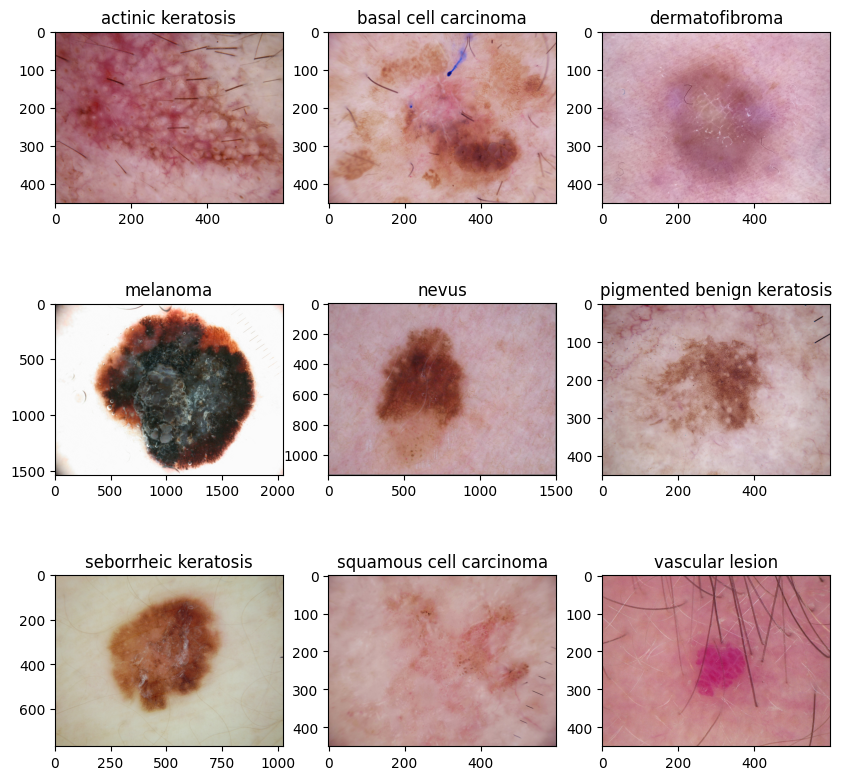

In [ ]:

import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    plt.title(class_names[i])
    plt.imshow(image)

In [ ]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,squamous cell carcinoma,181
2,basal cell carcinoma,376
3,nevus,357
4,pigmented benign keratosis,462
5,dermatofibroma,95
6,melanoma,448
7,seborrheic keratosis,77
8,vascular lesion,139


The image_batch is a tensor of the shape **(32, 180, 180, 3)**. This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). 

The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
### Your code goes here
from keras.layers import *
num_classes = 9
model = Sequential([ data_augument,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### **Compile the model**

Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 622s 2s/step - loss: 2.0609 - accuracy: 0.1889 - val_loss: 2.0309 - val_accuracy: 0.1960
Epoch 2/20
57/57 [==============================] - 5s 89ms/step - loss: 2.0287 - accuracy: 0.2000 - val_loss: 2.0283 - val_accuracy: 0.1960
Epoch 3/20
57/57 [==============================] - 5s 91ms/step - loss: 1.9997 - accuracy: 0.2333 - val_loss: 1.9174 - val_accuracy: 0.2918
Epoch 4/20
57/57 [==============================] - 5s 90ms/step - loss: 2.0276 - accuracy: 0.2211 - val_loss: 2.0302 - val_accuracy: 0.1849
Epoch 5/20
57/57 [==============================] - 5s 93ms/step - loss: 2.0188 - accuracy: 0.2111 - val_loss: 2.0251 - val_accuracy: 0.1960
Epoch 6/20
57/57 [==============================] - 5s 92ms/step - loss: 2.0143 - accuracy: 0.1944 - val_loss: 2.0233 - val_accuracy: 0.1982
Epoch 7/20
57/57 [==============================] - 5s 91ms/step - loss: 2.0125 - accuracy: 0.2100 - val_loss: 1.9973 - val_accuracy: 0.2294
Epoch 8/20
57/57 [======

### Visualizing training results

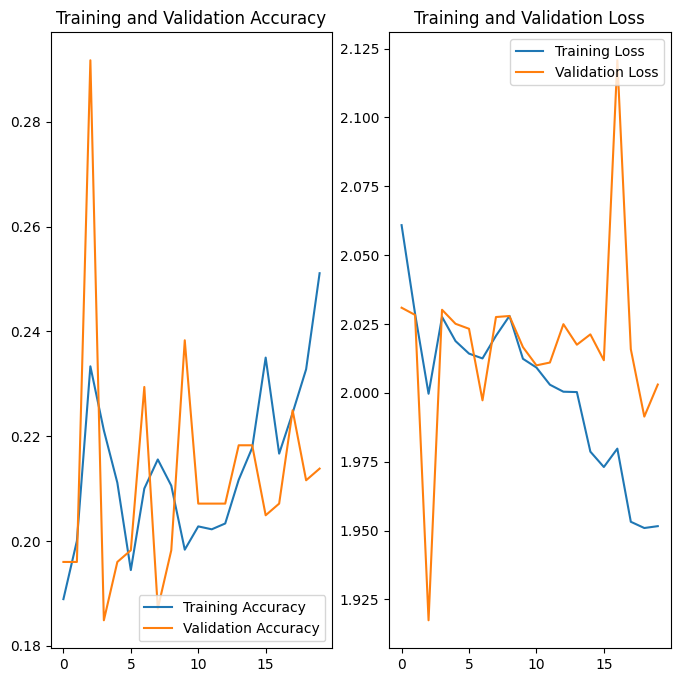

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
 ##### Finding on the first base model:
1. The model is overfitting around the 10-11th epoch .
2. The accuracy of the pattern is 75-80% because there are enough features to remember the pattern.


### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

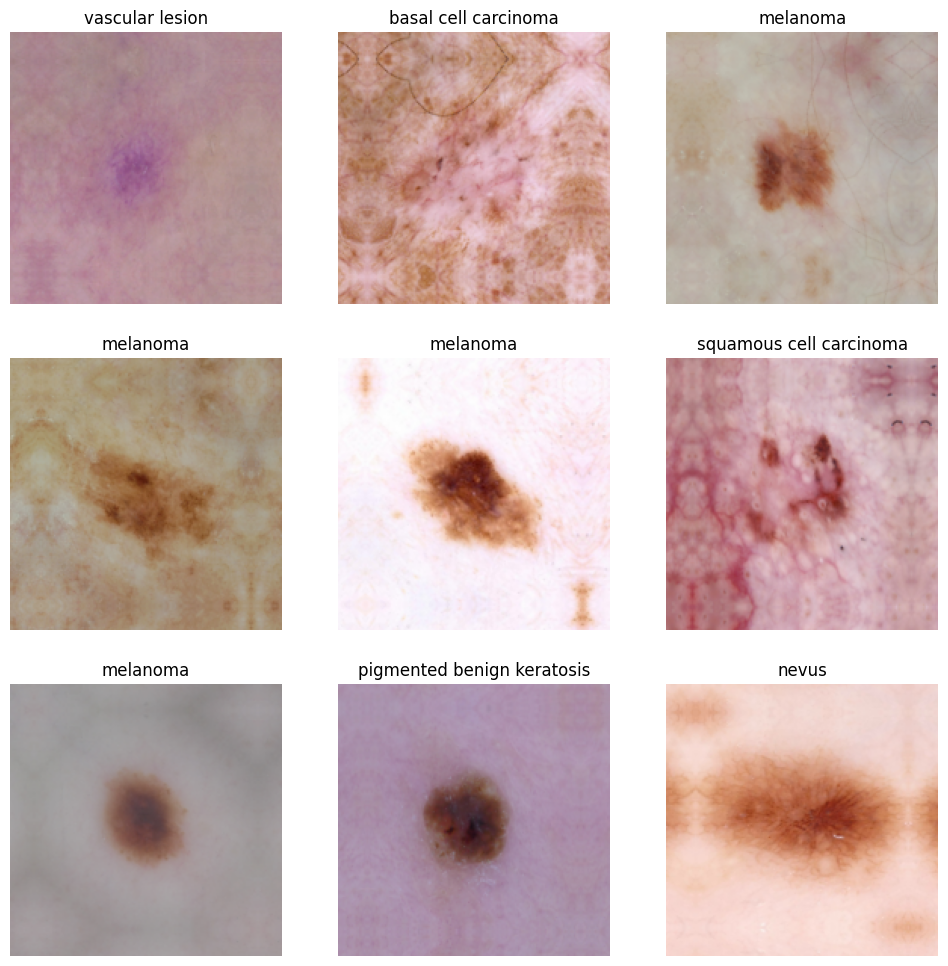

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Todo:
Create the model, compile and train the model

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here


from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

## Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
57/57 [==============================] - 9s 109ms/step - loss: 2.0733 - accuracy: 0.2072 - val_loss: 2.0432 - val_accuracy: 0.1915
Epoch 2/20
57/57 [==============================] - 6s 101ms/step - loss: 2.0196 - accuracy: 0.2272 - val_loss: 2.0240 - val_accuracy: 0.2116
Epoch 3/20
57/57 [==============================] - 6s 99ms/step - loss: 1.9363 - accuracy: 0.2917 - val_loss: 2.0633 - val_accuracy: 0.2361
Epoch 4/20
57/57 [==============================] - 6s 106ms/step - loss: 1.8172 - accuracy: 0.3283 - val_loss: 1.7700 - val_accuracy: 0.3274
Epoch 5/20
57/57 [==============================] - 6s 99ms/step - loss: 1.7125 - accuracy: 0.3839 - val_loss: 1.6119 - val_accuracy: 0.4053
Epoch 6/20
57/57 [==============================] - 6s 104ms/step - loss: 1.5977 - accuracy: 0.4339 - val_loss: 1.6182 - val_accuracy: 0.3742
Epoch 7/20
57/57 [==============================] - 6s 99ms/step - loss: 1.5478 - accuracy: 0.4539 - val_loss: 1.5326 - val_accuracy: 0.4588
Epoch 8/2

#### Visualizing the results

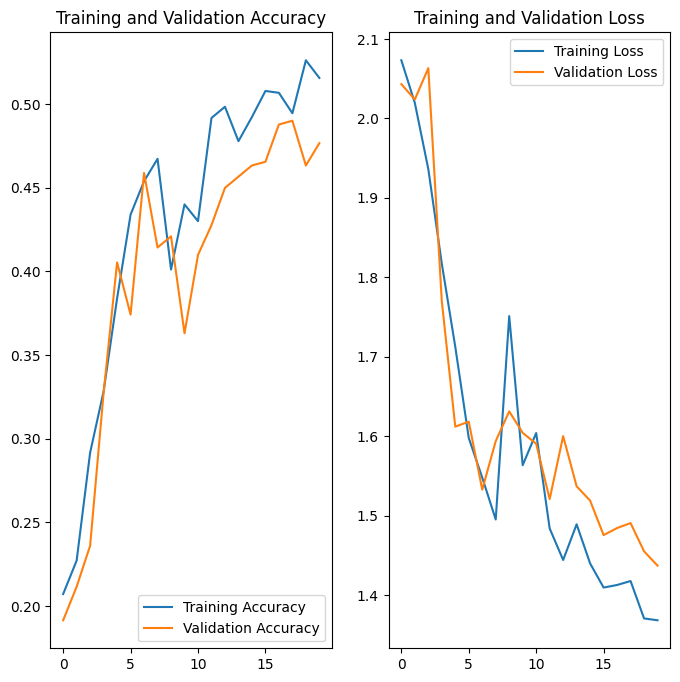

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit.
 Do you think there is some improvement now as compared to the previous model run?
1. Overfitting is handled after data augmentation.
2. Accuracy is not doing good for now.


### Todo: Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
1,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
2,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
3,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
4,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
...,...,...
2244,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2245,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2246,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2247,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
1,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
2,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
3,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
4,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
...,...,...
2244,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2245,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2246,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2247,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion


<BarContainer object of 9 artists>

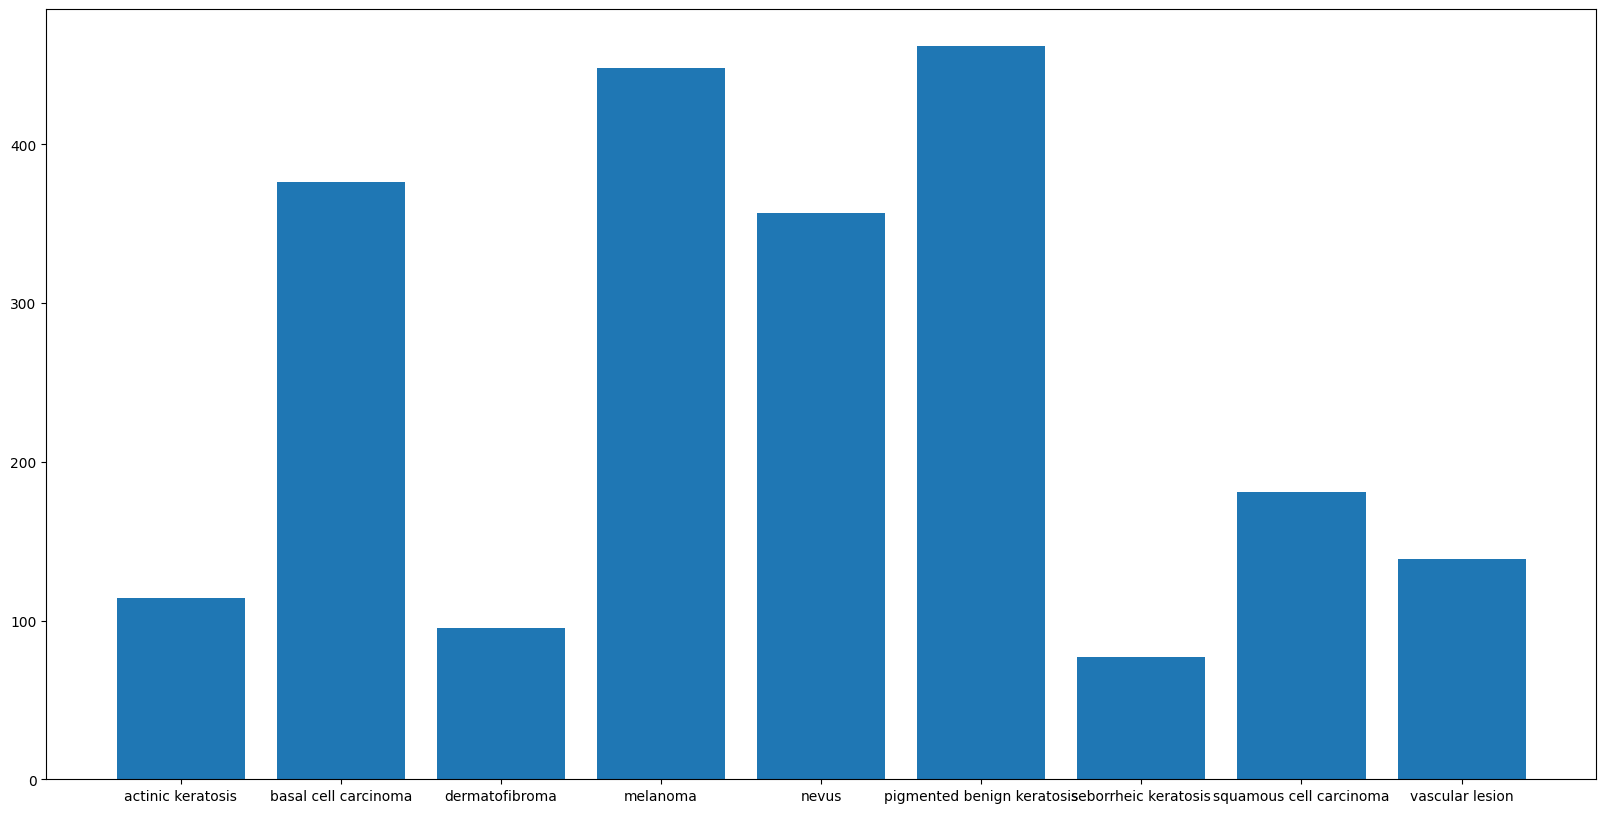

In [ ]:
Number=[]
for i in class_names:
    Number.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(20,10))
plt.bar(class_names,Number)

## Todo: Write your findings here:
- Which class has the least number of samples? - Seborrheic Ketosis
- Which classes dominate the data in terms proportionate number of samples? - Seborrheic kerarosis and dermatofibroma looks proportionate number of samples.

### Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
path_to_training_dataset="/content/gdrive/My Drive/Melanoma/Train/"
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F874D7ACE50>: 100%|██████████| 500/500 [00:20<00:00, 24.16 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F874D76D6A0>: 100%|██████████| 500/500 [00:21<00:00, 22.87 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F874D7D7340>: 100%|██████████| 500/500 [00:25<00:00, 19.39 Samples/s]


Initialised with 448 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F87E0BB6C70>: 100%|██████████| 500/500 [01:53<00:00,  4.42 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F874D72B940>: 100%|██████████| 500/500 [01:38<00:00,  5.09 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F87580BEBE0>: 100%|██████████| 500/500 [00:21<00:00, 23.65 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F87E0BB6C70>: 100%|██████████| 500/500 [00:48<00:00, 10.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F87D0038940>: 100%|██████████| 500/500 [00:20<00:00, 24.26 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F87D0214820>: 100%|██████████| 500/500 [00:22<00:00, 22.44 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.


In [ ]:
data_dir_train_1=pathlib.Path("/content/gdrive/My Drive/Melanoma/Train/")
image_count_train = len(list(data_dir_train_1.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
##
for i in class_names:
      
    for j in data_dir_train_1.glob(i+'*'+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
1,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
2,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
3,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
4,/content/gdrive/My Drive/Melanoma/Train/actini...,actinic keratosis
...,...,...
2244,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2245,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2246,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion
2247,/content/gdrive/My Drive/Melanoma/Train/vascul...,vascular lesion


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      448
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Todo: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Todo: Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/My Drive/Melanoma/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 5400 files for training.


Todo: Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


### Todo: Create your model (make sure to include normalization)

In [ ]:
## your code goes here

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

Todo: Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Todo: Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
# not using 50 epicos as in problem statement it is mentioned to train model  on 30 epochs
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 44s 223ms/step - loss: 1.9175 - accuracy: 0.2578 - val_loss: 1.6723 - val_accuracy: 0.3647
Epoch 2/30
169/169 [==============================] - 38s 215ms/step - loss: 1.6660 - accuracy: 0.3656 - val_loss: 1.5380 - val_accuracy: 0.4277
Epoch 3/30
169/169 [==============================] - 38s 218ms/step - loss: 1.5248 - accuracy: 0.4230 - val_loss: 1.4949 - val_accuracy: 0.4596
Epoch 4/30
169/169 [==============================] - 37s 214ms/step - loss: 1.4192 - accuracy: 0.4656 - val_loss: 1.4120 - val_accuracy: 0.4611
Epoch 5/30
169/169 [==============================] - 36s 205ms/step - loss: 1.2615 - accuracy: 0.5243 - val_loss: 1.2177 - val_accuracy: 0.5619
Epoch 6/30
169/169 [==============================] - 37s 214ms/step - loss: 1.1512 - accuracy: 0.5776 - val_loss: 1.1949 - val_accuracy: 0.5471
Epoch 7/30
169/169 [==============================] - 40s 233ms/step - loss: 0.9741 - accuracy: 0.6319 - val_loss: 1.0029 - val_accuracy: 0.6

Todo: Visualize the model results

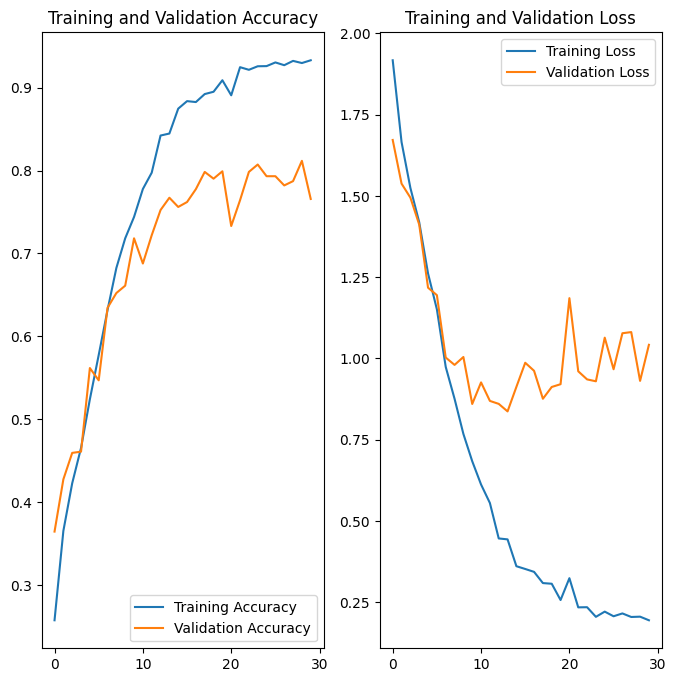

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
- Accuracy has improved after data augmentation however model has little amount of overfitting ie:
1. Training accuracy = 93%
2. Validation accuracy = 77%

- We can solve problem of overfitting by adding more training data and more regularization.